# Proximity-Based Anomaly Detection

This notebook demonstrates how to identify anomalies using proximity-based methods.

## Import necessary libraries

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors

## Define helper function

In [2]:
def db_outlier_detection(data: np.ndarray, r: float, pi: float) -> list:
    """
    Detect outliers using the DB(r, π)-outlier detection method.

    Args:
        data (np.ndarray): The dataset to be analyzed.
        r (float): The radius used to define the neighborhood.
        pi (float): The threshold used to classify outliers.

    Returns:
        list: A list containing the indices of the outliers.
    """

    # Number of data points.
    n_points = len(data)

    # Use NearestNeighbors to find points within the specified radius.
    nbrs = NearestNeighbors(radius=r).fit(data)
    neighbors = nbrs.radius_neighbors(data, return_distance=False)

    # List to store outliers.
    outliers = []

    # Calculate density for each point.
    for i, neighbor_list in enumerate(neighbors):

        # Calculate the density (proportion of points within radius r).
        density = len(neighbor_list) / n_points

        # If the density is less than or equal to the threshold, mark as an
        # outlier.
        if density <= pi:
            outliers.append(i)

    return outliers

## Define colors and generate dataset

In [3]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#C03B26", # Red
    "#44546A", # Gray
]

# Anisotropicly distributed data.
N_SAMPLES = 500
RANDOM_STATE = 170
X, _ = datasets.make_blobs(n_samples=N_SAMPLES, random_state=RANDOM_STATE)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

# Creating a DataFrame for the dataset.
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

## DB(r, π)-outlier Detection Method

In [4]:
# Detect outliers using the DB(r, π)-outlier detection method.
outliers = db_outlier_detection(df.values, r=0.5, pi=0.01)
df["DB"] = np.where(np.isin(np.arange(len(df)), outliers), 1, 0)

## Visualization: DB(r, π)-outlier

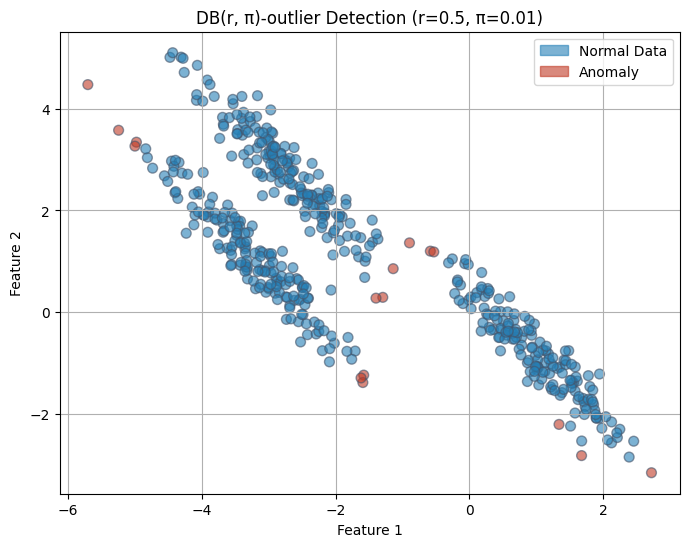

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df["Feature 1"], df["Feature 2"],
    c=np.where(df["DB"], colors[1], colors[0]),
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Custom legend for clarity.
initial_patch = mpatches.Patch(color=colors[0], alpha=0.6, label="Normal Data")
final_patch = mpatches.Patch(color=colors[1], alpha=0.6, label="Anomaly")
plt.legend(
    handles=[initial_patch, final_patch]
)

plt.title("DB(r, π)-outlier Detection (r=0.5, π=0.01)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## Local Outlier Factor (LOF)

In [6]:
# Distance-based method: Local Outlier Factor (LOF).
lof = LocalOutlierFactor(n_neighbors=20)
df["LOF"] = lof.fit_predict(df)

## Visualization: LOF

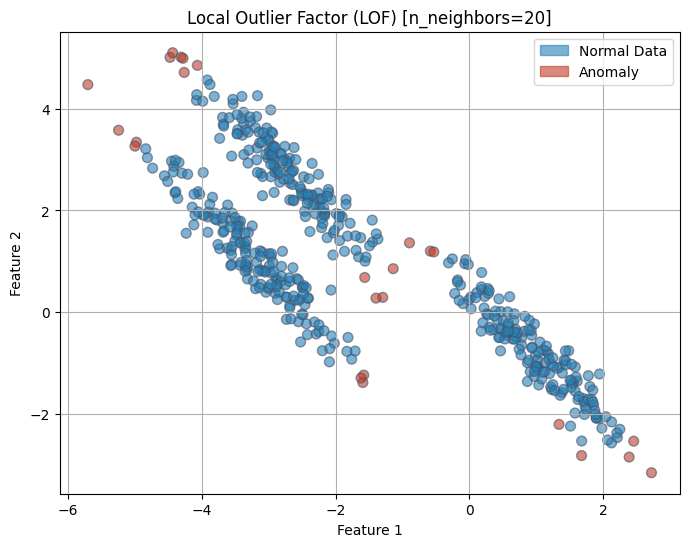

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df["Feature 1"], df["Feature 2"],
    c=np.where(df["LOF"]==1, colors[0], colors[1]),
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Custom legend for clarity.
initial_patch = mpatches.Patch(color=colors[0], alpha=0.6, label="Normal Data")
final_patch = mpatches.Patch(color=colors[1], alpha=0.6, label="Anomaly")
plt.legend(
    handles=[initial_patch, final_patch]
)

plt.title("Local Outlier Factor (LOF) [n_neighbors=20]")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()